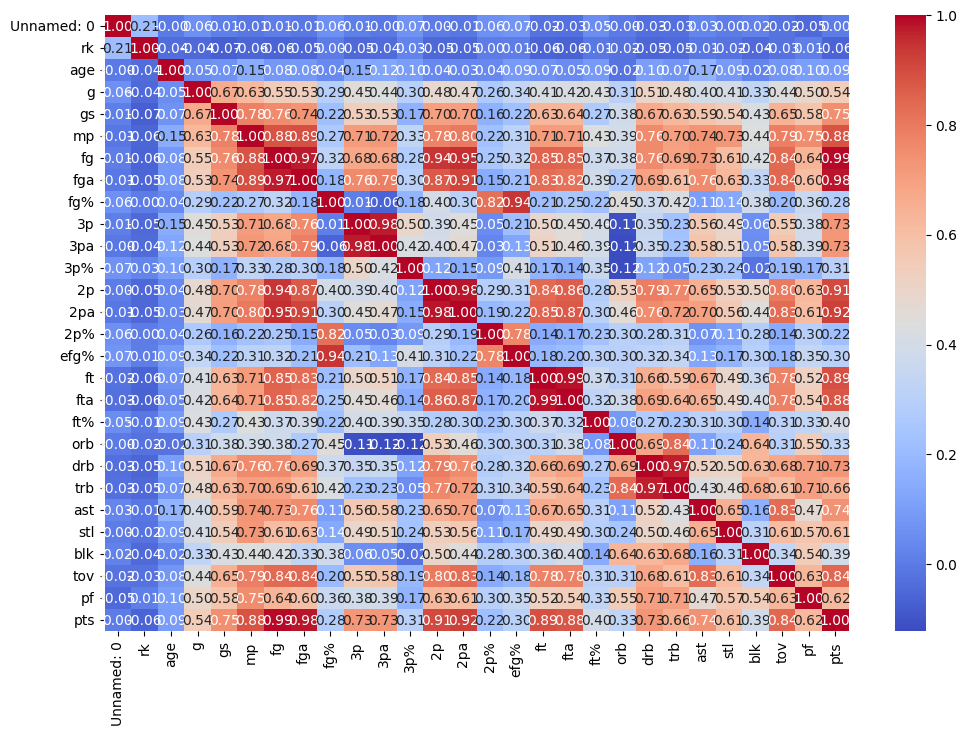

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Load the dataset
nba_df = pd.read_csv("../data/NBA_Regular_Season_Stats_2021-2024.csv")

# Compute the correlation matrix
numeric_columns = nba_df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = nba_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Convert categorical columns 'pos' and 'tm' into numerical using one-hot encoding
#nba_df_encoded = pd.get_dummies(nba_df, columns=['pos', 'tm'], drop_first=True)

# Drop unnecessary columns (double-check irrelevant ones)
#nba_df_encoded = nba_df.drop(labels=['player', 'Unnamed: 0', 'rk', 'season'])

# Train the RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


# Initialize a simple linear regression model
model = LinearRegression()

# RFE with a linear model
selector = RFE(model, n_features_to_select=10)
selector.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['2pa', 'efg%', 'fg', 'ft', 'ft%', 'g', 'mp', 'pf', 'rk', 'stl'], dtype='object')
